In [1]:
from largeN_algo import limit_ratio
from classic_algos import greedy_ratio
from tabulate import tabulate
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

### Plot Example
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
})

## Limit ratio as function of temperature

We plot the limit ratio 

\begin{equation}
\lambda_{\ell} = - T\ln(z_0) + T \ln w_{\ell} \left( \frac{1-p_{\text{thresh}}}{p_{\text{thresh}}}\right)
\end{equation}

as a function of $T$. We set the value of $p_{\text{thresh}} =1/2$ to eliminate the second term. 

----

#### Weight, Value, and Limit

In [85]:
## Weight and Value Parameters; randomly selected

limit_ratio_list = ['Large N ratio']
greedy_ratio_list = ['Greedy ratio']

# set seed
np.random.seed(42) 
nelem_list = [10**k for k in range(2, 6)]
    
for nelem in nelem_list: 

    # Randomly choose the value and weight of each object
    weight_vec = np.random.randint(1,100,nelem)
    value_vec = np.random.randint(1,100,nelem)

    # Defining Weight limit as the average 
    # of the weights of randomly chosen objects
    empt_list = []
    for k in range(100):
        empt_list.append(np.dot(np.random.randint(0,2,nelem), weight_vec))
    Wlimit = int(np.mean(empt_list))

    limit_ratio_value = limit_ratio(weights = weight_vec, values = value_vec, limit = Wlimit, T = 1.0, threshold = 0.5)
    limit_ratio_list.append(limit_ratio_value)
    
    ratio_greedy_dp = greedy_ratio(weights = weight_vec, values = value_vec, limit = Wlimit)
    greedy_ratio_list.append(ratio_greedy_dp)
        
        
# creating table of results
tabular_results = [limit_ratio_list, greedy_ratio_list]

print(tabulate(tabular_results, [str(elem) for elem in nelem_list], tablefmt="grid"))        

+---------------+----------+---------+----------+----------+
|               |      100 |    1000 |    10000 |   100000 |
+===============+==========+=========+==========+==========+
| Large N ratio | 0.783772 | 0.69993 | 0.735195 | 0.752867 |
+---------------+----------+---------+----------+----------+
| Greedy ratio  | 0.789474 | 0.69697 | 0.734177 | 0.752688 |
+---------------+----------+---------+----------+----------+


#### Computing solution for each temperature

In [81]:
Tvals = np.linspace(.25, 1.0, 300)
limit_ratio_list = list()
ratio_greedy_list = list()

for Tval in Tvals: 
    limit_ratio_value = limit_ratio(weights = weight_vec, values = value_vec, limit = Wlimit, T = Tval, threshold = 0.5)
    
    ratio_greedy_dp = greedy_ratio(weights = weight_vec, values = value_vec, limit = Wlimit)
    
    limit_ratio_list.append(limit_ratio_value)
    ratio_greedy_list.append(ratio_greedy_dp)

#### Plotting Value

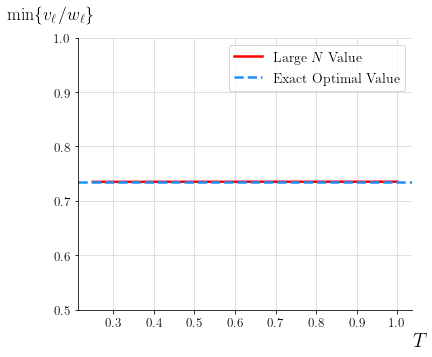

In [82]:
# figure
plt.figure(figsize = (6, 5))
ax = plt.subplot(111)

#plots of values
plt.plot(Tvals, limit_ratio_list, color = 'red', label = r'Large $N$ Value', linewidth = 2.5)
ratio_greedy_dp = greedy_ratio(weights = weight_vec, values = value_vec, limit = Wlimit)
plt.axhline(y = ratio_greedy_dp, color = 'dodgerblue', linestyle = '--', label = 'Exact Optimal Value', linewidth = 2.5)
    
# plot formatting
plt.xlabel(r'$T$', fontsize = 20, x = 1.02)
plt.ylabel(r'$\min\{v_{\ell}/w_{\ell}\}$', fontsize = 18, rotation = 0,y = 1.05)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.ylim([0.5,1.0])
# plt.xlim([.1, 3.5])
plt.legend(loc = 'best', fontsize = 14)
plt.grid(alpha = 0.5)

# plt.savefig('/Users/mobolajiwilliams/Dropbox/0Tex_Files_Mac/2020_largeN_knapsack_problem/value_vs_temp.eps', format='eps', dpi = 1200, bbox_inches = 'tight')

plt.show()
